## Mid term Project

# ECG and ECG signals:

ECGs are important biomedical signals, which are reflective of an electric activity of the heart. They form a subject of intensive research for over 100 years. ECG signals are one of the best-understood signals being at the same time an important source of diagnostic information. Because of this, in the recent years there has been a steady and intensive research with intent of developing efficient and effective methods of processing and analysis of ECG signals with emphasis on the discovery of essential and novel diagnostic information.This chapter offers a comprehensive overview of main problems concerning analysis and signal processing in ECG systems. Here the systems are meant in a broad sense embracing monitoring, diagnostic and therapeutic systems, whose functioning relies in one way or another on the analysis of electrocardiograms. In general we will be referring to them as ECG systems. An analysis of ECG signals requires their preprocessing and a suitable representation so that depending upon the nature of the ECG system, it helps reveal the required diagnostic information.The chapter is arranged into three parts. In the first one, we focus on the essentials of ECG signals, its characteristic features, and the very nature of the associated diagnostic information. In the second part, we elaborate on a sequence of phases of ECG signal processing, and analysis as they appear in ECG systems. Finally, in the third part, we offer a description of essential ECG tests.[1]


 ans 4 : The length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


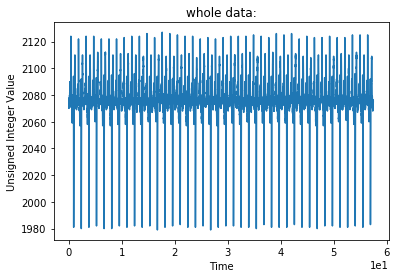

In [3]:

%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division

#we use a simple open command for the file (basic Python)
f = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16) 
print('\n ans 4 : The length of the file is: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 lines')
x=np.arange(0,43081/750.,1/750.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
plt.subplot(111)
plt.plot(x,AllSignal[:43081])
plt.title('whole data:')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format( axis='x', scilimits=(0,0))
f.close()

ans 5: If suppose person has 60 beats per minutes. Then we need to plot samples till 7 sec (5 sec for beats and 2 sec for signal acquaring and reverse recovery pulse) to include 5 beats with reverse recovery pulse. Let's Sampling time is ST,Sampling  Frequency F and Required samples N.

$$ST=\frac{1}{F} $$

$$ N=\frac{7}{ST}$$

$$N=5250$$

This Numbers of sample are also works for 100 beats per minutes as well. 


 answer 6 :


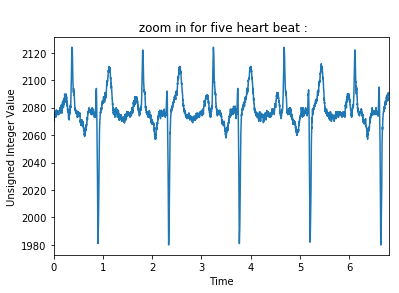

In [4]:
print('\n answer 6 :')
x1=np.arange(0,5250/750.,1/750.)
plt.plot(x1,AllSignal[:5250])
plt.title('\n zoom in for five heart beat :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,6.8])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


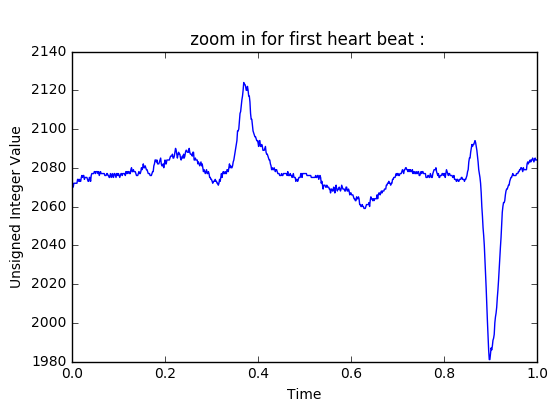

In [3]:

x1=np.arange(0,750/750.,1/750.)
plt.plot(x1,AllSignal[:750])
plt.title('\n zoom in for first heart beat :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ans 7: Due to short QRS complex curve person has low blood pressure.

QRS peak is 2124
ans 8: Heart beats per minute is 44


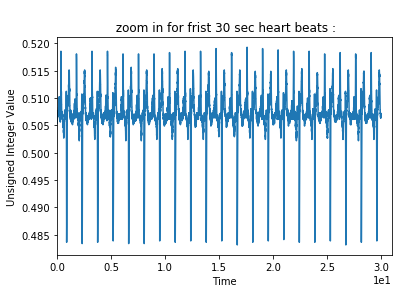

In [6]:
t=np.arange(22500)
B=0
x1=np.arange(0,22500/750.,1/750.)
plt.plot(x1,AllSignal[:22500]/4096)
plt.title('\n zoom in for frist 30 sec heart beats :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,31])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
x=np.amax(AllSignal[:750])
print 'QRS peak is ' +str (x)
for index in t:
    if AllSignal[index]>=2124:
        B=B+1
print 'ans 8: Heart beats per minute is ' +str(B*2)        
        
    
        



answer 9 and answer 10
Peak in DFT data is 4.98149090804
Maximum is observed at f=1.39275766017


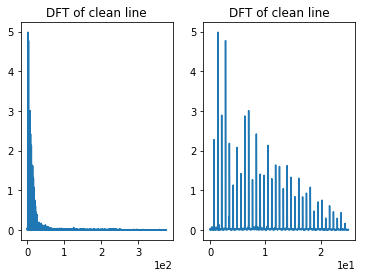

In [8]:
from __future__ import division
Line=AllSignal[:43080]
L2=np.arange(21540)
#we first eliminate dc
dataF=Line-np.mean(Line)
L=len(dataF)

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
 


plt.subplot(121)
plt.plot(f, PyyClean[:21540])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
p=np.amax(PyyClean[:21540])
print 'answer 9 and answer 10'
print 'Peak in DFT data is ' +str(p)
for index in L2:
    if PyyClean[index]>=4.9814:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 
       

        
        

    

Answer 11

Heart rate H is

$$H=\frac{60}{f}$$  where f is frequency at peak observed

$$H=44$$

Ans 12 : From Dft I can conclude that the frequencies below the 3 Hz is harmonics or noise. So We can esily estimate our cutoff
         frequency for our bandpass/lowpass filter. From the above data that my maximum peak is at 4.98 Hz and it occures at              1.39 Hz step size . In short at every 1/1.39 sec one heart beat occurs means for Heart beats per minutes = 60/1.39 = 44          BPM approx.
         
Ans 13 : The Low pass filter may affect the wavelength, amplitude and the interval time of the ECG. when we apply the filter              with cutoff frequency it will reduce the amplitude by 5 to 20 millivolts. So in all, i can say that it won't affect              much to our signal.[2]  

Answer 14 and Answer 15

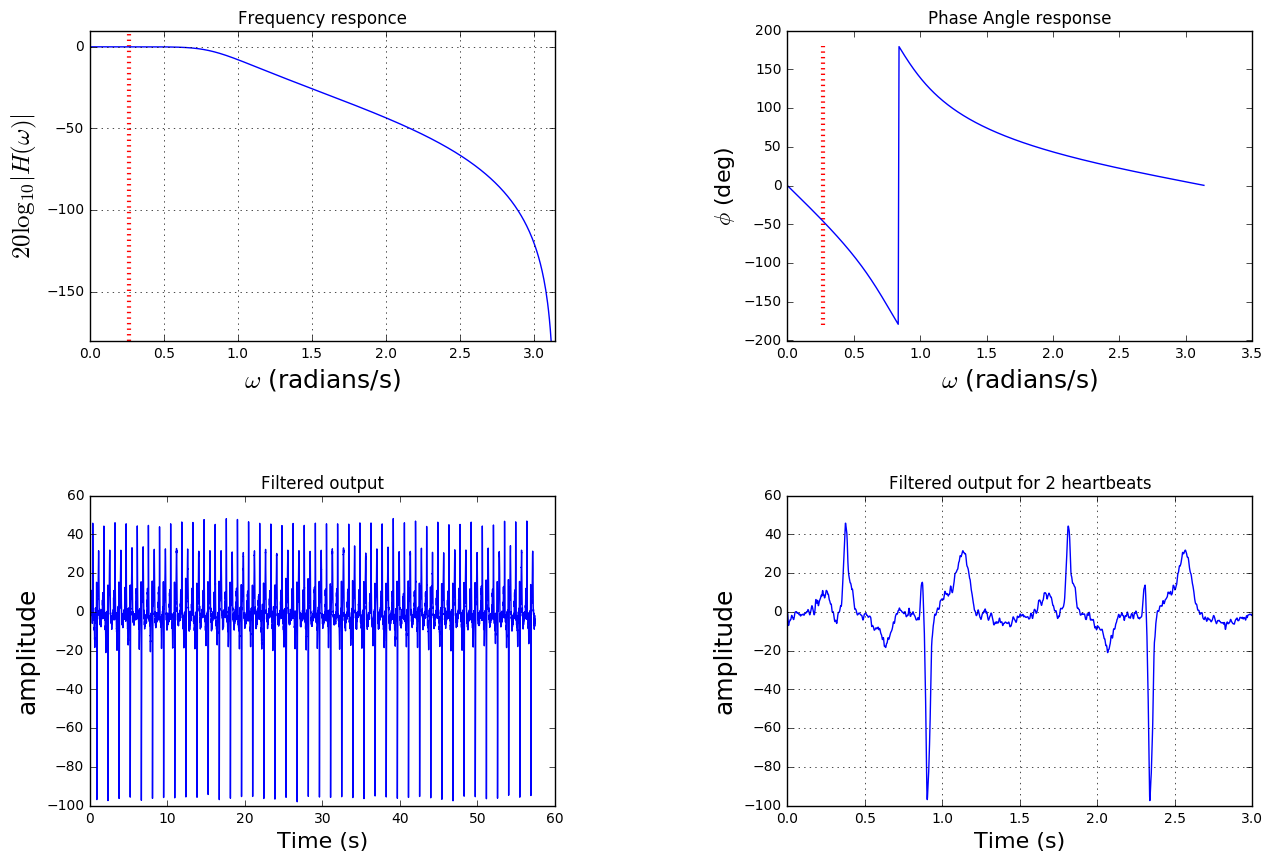

In [6]:
from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s)
ax.set_title('Filtered output')
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Time (s)',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s)
ax.set_xlim(xmax = 3, xmin =0)
ax.set_title('Filtered output for 2 heartbeats')
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Time (s)',fontsize=16)

ax.grid()

Answer 16

Peak in DFT data is 4.98133389394
Maximum is observed at f=1.39275766017


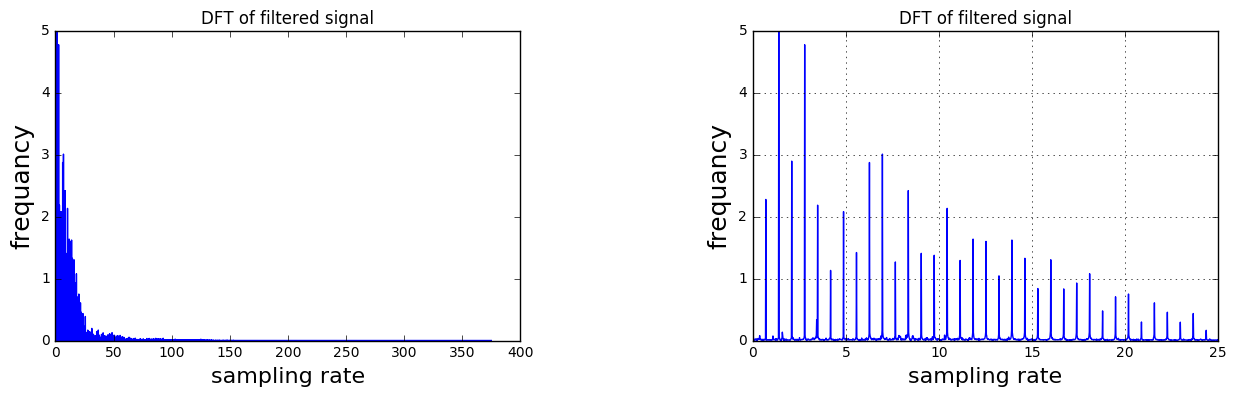

In [10]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

LL=len(s)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=np.arange(0,750/2,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)
indx=np.where(ff>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)

ax.grid()

p=np.amax(Pyy[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 

There is no effect on amplitude of Signal because it remains same as before. 

ans 17 : butterworth filter gives smooth and flat responce. It reduces somewhat amplitude and it depends on the cutoff freq. The          butterworth filter has best capability to reduce attenuation and gives smooth line and even it doesnt affect the                smapling rate. The Transision band is wide and the slop is non linear in the frequency response means that it choose            diffrent response for diffrent frequencies. 
         To sum up, applying this filter  won't affect major. it affect little bit and it is acceptable to get information from          ECG signal.[3]  



# Bibliography

1) "ECG Signal Processing, Classification and Interpretation.", Adam GacekWitold Pedrycz, Springer, London

2) "The simulation results of the high-pass and low-pass filter effect on the quality of micropotential recordings on the       electrocardiogram "Co-Publisher: OMICS Group, www.omicsonline.org Volume 6, Issue 1, Article ID: BM-015-14, 2014 eISSN: 09748369

3) "The impact of digital filtering to ECG analysis: Butterworth filter application" Sonal K. Jagtap; M. D. Uplane
2012 International Conference on Communication, Information & Computing Technology (ICCICT)
Year: 2012
